In [35]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
import PIL
import cv2
import pickle

In [36]:
from zipfile import ZipFile
file_name = "Dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  zip.printdir()

File Name                                             Modified             Size
Dataset/                                       2021-10-29 21:16:56            0
Dataset/masked/                                2021-10-31 16:02:50            0
Dataset/masked/100.jpg                         2021-10-29 21:17:30        10840
Dataset/masked/101.jpg                         2021-10-29 21:17:30         7223
Dataset/masked/102.jpg                         2021-10-29 21:17:30         9621
Dataset/masked/103.jpg                         2021-10-29 21:17:30        10908
Dataset/masked/104.jpg                         2021-10-29 21:17:30         6155
Dataset/masked/106.jpg                         2021-10-29 21:17:30         7276
Dataset/masked/107.jpg                         2021-10-29 21:17:30         2998
Dataset/masked/108.jpg                         2021-10-29 21:17:30        11971
Dataset/masked/109.jpg                         2021-10-29 21:17:30         7502
Dataset/masked/110.jpg                  

In [37]:
import pathlib
DIRECTORY = "Dataset" 
CATEGORIES = ['masked','unmasked']
IMG_SIZE = 250 # IMG_SIZE = 224 alternative size 

X = []
y = []

def create_data():
    for category in CATEGORIES:
        path = DIRECTORY + "/" + category
        class_num_label = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
              img_array = cv2.imread(path+"/"+img, cv2.IMREAD_GRAYSCALE)
              img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
              X.append(img_array)
              y.append(class_num_label)
            except Exception as e:
              pass           
create_data()

In [38]:
X

[array([[ 97,  97,  99, ...,  89,  82,  80],
        [ 98,  98, 101, ...,  94,  84,  81],
        [103, 103, 104, ...,  98,  86,  82],
        ...,
        [117, 115, 111, ...,  65,  66,  67],
        [120, 118, 114, ...,  65,  67,  67],
        [123, 121, 117, ...,  64,  65,  66]], dtype=uint8),
 array([[64, 65, 66, ..., 41, 40, 40],
        [64, 65, 66, ..., 41, 40, 40],
        [64, 65, 66, ..., 41, 40, 40],
        ...,
        [26, 26, 26, ..., 25, 26, 27],
        [26, 26, 26, ..., 24, 25, 26],
        [26, 26, 26, ..., 25, 26, 27]], dtype=uint8),
 array([[49, 51, 54, ..., 71, 74, 75],
        [50, 51, 54, ..., 72, 74, 76],
        [51, 53, 55, ..., 72, 75, 77],
        ...,
        [80, 78, 75, ..., 48, 48, 49],
        [78, 76, 73, ..., 47, 48, 48],
        [75, 74, 72, ..., 46, 46, 46]], dtype=uint8),
 array([[49, 50, 52, ..., 17, 17, 17],
        [50, 51, 53, ..., 16, 16, 16],
        [50, 52, 54, ..., 15, 15, 15],
        ...,
        [37, 35, 31, ..., 42, 41, 40],
        [

In [39]:
SAMPLE_SIZE = len(y)
data = np.array(X).flatten().reshape(SAMPLE_SIZE, IMG_SIZE*IMG_SIZE) # pixel-features

# Turn X and y into numpy arrays
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE) # images
y = np.array(y) # target

print("Features, X shape: ", X.shape)
print("Target, y shape: ", y.shape)
print("Data shape: ", data.shape)

Features, X shape:  (1794, 250, 250)
Target, y shape:  (1794,)
Data shape:  (1794, 62500)


C:\Users\hp\AppData\Local\Temp/ipykernel_6928/2417481180.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(5 / columns + 1, columns, i + 1)


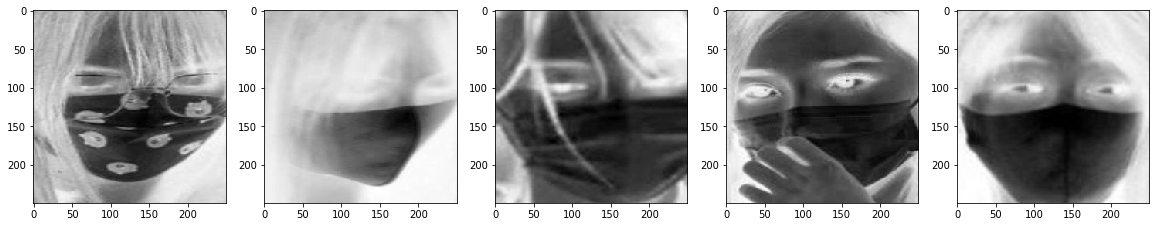

In [40]:
import matplotlib.pyplot as plt # to plot image, graph
%matplotlib inline

plt.figure(figsize=(20,10))
columns = 5
for i in range(5):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i],cmap=plt.cm.gray_r,interpolation='nearest')

In [41]:
print('No.of Samples:', len(y))
print('No.of Without A Mask:', (y == 0).sum())
print('No.of With A Mask:', (y == 1).sum())

No.of Samples: 1794
No.of Without A Mask: 904
No.of With A Mask: 890


In [42]:
X=X.reshape(1794,250*250)

In [43]:
# Split our data into testing, training and validation.
X_train_new,X_test_new,Y_train_new,Y_test_new=train_test_split(X,y,test_size=0.3,random_state=42)
X_val_new,X_test_new,Y_val_new,Y_test_new=train_test_split(X_test_new,Y_test_new,test_size=0.3,random_state=42)

In [44]:
X_train_new.shape

(1255, 62500)

In [45]:
X_test_new.shape

(162, 62500)

In [46]:
Y_train_new.shape

(1255,)

# KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
parameters = {'n_neighbors':[1,3,9,15]}
GS_clf = GridSearchCV(KNeighborsClassifier(), parameters)
GS_clf.fit(X_val_new,Y_val_new)
GS_clf.best_params_

{'n_neighbors': 3}

In [50]:
clf_01=KNeighborsClassifier(n_neighbors=3)
clf_01.fit(X_train_new, Y_train_new)

KNeighborsClassifier(n_neighbors=3)

In [51]:
from sklearn.linear_model import LogisticRegression
MODEL = LogisticRegression()
MODEL.fit(X_train_new, Y_train_new)

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_pred_01 = clf_01.predict(X_test_new)
accuracy_01 = clf_01.score(X_test_new, Y_test_new)
print("Accuracy %f" % accuracy_01)
metrics.accuracy_score(y_true=Y_test_new, y_pred=y_pred_01)

Accuracy 0.833333


0.8333333333333334

In [53]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_new,y_pred_01))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        88
           1       0.80      0.85      0.82        74

    accuracy                           0.83       162
   macro avg       0.83      0.83      0.83       162
weighted avg       0.84      0.83      0.83       162



In [54]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf_01,X,y,cv=5)
print(scores.mean())

0.7413812421219713
